## Adding a new training objective to ```spred```
-------------------------------------------------

In this tutorial, we show how to add a new training objective for selective prediction. We will create a training objective that allows a neural network to get "half-credit" for abstaining when it is uncertain.

**Before doing this tutorial, it is recommended that you first go through the tutorial "Adding a new task to ```spred```".**

Let's begin by setting up a task and training a prediction function for it. In this tutorial, we'll use the classic MNIST handwritten digit recognition task, but we randomly swap the labels of ones and sevens to make those labels synthetically "harder".

In [1]:
task_config = {"name": "mnist",
               "confuser": "1<>7"}

For our prediction function, we'll use a simple feedforward neural network with two hidden layers. MNIST images are always 28x28 pixels, thus the input vectors have size 784. As there are 10 digits, the output size of the network is 10.

Before creating a new loss function, let's try a baseline using standard cross-entropy loss.

In [4]:
model_config = {"architecture": "feedforward",
                "input_size": 784,
                "hidden_sizes": [128, 64],
                "output_size": 10,
                "loss": {
                    "name": "ce"
                }}

We'll extract confidence using the generally reliable **MaxProb** confidence function.

In [13]:
confs = [{"name": "max_prob"}]

Now that we've specified our task, our model, and our confidences, let's bundle them together into an experiment configuration. We'll also specify a couple extra details, like the optimizer (stochastic gradient descent with momentum of 0.9 and a learning rate of 0.003), the batch size (64), and the number of training epochs (30).

In [14]:
ce_config = {"task": task_config,
             "network": model_config,
             "confidences": confs,
             "optimizer": {"name": "sgd",
                           "lr": 0.003,
                           "momentum": 0.9},
             "bsz": 64,
             "n_epochs": 15}

Let's run 3 trials of the experiment and visualize the results.

In [95]:
from spred.experiment import Experiment
from spred.analytics import ResultDatabase
ce_exp = Experiment(ce_config)
n_trials = 3
ce_results = [ce_exp.run() for _ in range(n_trials)]

Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 909.55it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 999.55it/s] 


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 963.87it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 989.01it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1011.99it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1007.89it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1012.44it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1013.14it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1014.80it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1013.81it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1013.65it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1009.46it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1011.46it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1014.11it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1014.03it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 190.72it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.829,
    "aupr": 0.9798529937257401,
    "auroc": 0.901949223682447,
    "avg_crr_conf": 0.8809689762454987,
    "avg_err_conf": 0.5318010973564365,
    "avg_non_abstain": 1.0,
    "capacity": 0.9670073600933268,
    "kendall_tau": 0.09805084685981137,
    "n_correct": 8290,
    "n_errors": 1710,
    "validation_loss": 0.36291230626546656
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 873.16it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 985.81it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 928.63it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 987.09it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 994.17it/s] 


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1004.10it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 989.89it/s] 


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 965.63it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 986.83it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1009.06it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 1010.73it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1007.70it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1009.00it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1007.51it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1008.95it/s]


Best validation accuracy at epoch 14


100%|██████████| 157/157 [00:00<00:00, 191.11it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.8316,
    "aupr": 0.9794300257664654,
    "auroc": 0.898996361362751,
    "avg_crr_conf": 0.8834662801832921,
    "avg_err_conf": 0.5335842628837199,
    "avg_non_abstain": 1.0,
    "capacity": 0.9671360841342331,
    "kendall_tau": 0.1010036743409665,
    "n_correct": 8316,
    "n_errors": 1684,
    "validation_loss": 0.36522007273260954
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_prob'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 1008.40it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 1002.98it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 1003.43it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 1005.25it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 1006.62it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 1007.64it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 1008.00it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 1007.02it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 1007.86it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 1008.24it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 967.85it/s] 


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 1005.16it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 1014.27it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 1013.33it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 1012.27it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 192.88it/s]


{'name': 'max_prob'}
{
    "accuracy": 0.837,
    "aupr": 0.9806607339066311,
    "auroc": 0.9010408924657887,
    "avg_crr_conf": 0.8866441569038475,
    "avg_err_conf": 0.5349262354929755,
    "avg_non_abstain": 1.0,
    "capacity": 0.9689679627623983,
    "kendall_tau": 0.09895910753421143,
    "n_correct": 8370,
    "n_errors": 1630,
    "validation_loss": 0.3486888435236208
}


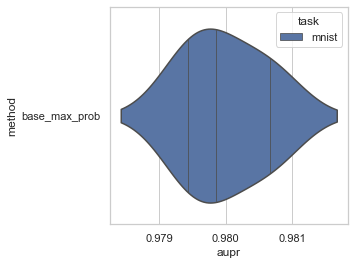

In [99]:
from spred.analytics import plot_evaluation_metric
plot_evaluation_metric(ResultDatabase(ce_results), "aupr")

Now let's try a loss function besides boring ole cross-entropy! To create one, we need to implement the ```ConfidenceLoss``` interface in ```spred.confidence```. Here's a partial view of that interface.

    class ConfidenceLoss(torch.nn.Module, ABC):
        @abstractmethod
        def __call__(self, batch):
            """
            For the set of predictions in the batch, computes a numeric loss.
    
            ```batch``` is a dictionary with the following keys:
            - ```outputs```: a torch.tensor of shape BxL, where B is the batch size
              and L is the number of labels. Each row corresponds to the predicted
              values for each label. These are not assumed to be normalized.
            - ```labels```: a torch.tensor of shape B, where B is the batch size.
            The elements are the gold labels for the batch instances.
            - ```confidences```: a torch.tensor of shape B, where B is the batch size.
            The elements are the model's confidences for the batch instances.
            - ```loss```: the model's default loss for the batch
    
            This function is expected to return a torch.tensor containing a single
            element -- the loss for the batch.
    
            """
            ...
            
    
        def include_abstain(self):
            """
            Returns whether this loss function assumes an explicit "abstain" label,
            in addition to the set of task labels.
    
            """
            return False
            
            
The ```ConfidenceLoss``` interface has only one abstract method that must be overridden, which is ```__call__```. The ```__call__``` method takes a dictionary called ```batch``` as its only argument, which contains the predictions made by a model on a minibatch of input instances. At a minimum, the ```batch``` will contain two keys:
- ```outputs```: a ```torch.tensor``` of shape ```B```x```L```, where ```B``` is the batch size and ```L``` is the number of labels. Each row corresponds to the predicted values for each label. These are not assumed to be normalized.
- ```labels```: a ```torch.tensor``` of shape ```B```, where ```B``` is the batch size. The elements are the gold labels for the batch instances.

Depending on the prediction model, it may also contain:
- ```confidences```: a torch.tensor of shape ```B```, where ```B``` is the batch size. The elements are the model's confidences for the batch instances.
- ```loss```: the model's default loss for the batch

Let's see how this works with ```CrossEntropyLoss``` on an example batch.

In [39]:
from torch import tensor
from spred.loss import CrossEntropyLoss

batch = {'outputs': tensor([[-1.5, -2.,  0.8,  1.2],
                            [-2.5,  0.,  1.2, -1.8]]), 
         'labels': tensor([2, 0])}

ce = CrossEntropyLoss()
ce(batch)

tensor(2.4973)

```CrossEntropyLoss``` computes a loss of 2.4973 by first computing the prediction weights in 'outputs' to probability distributions using softmax:

In [40]:
from spred.util import softmax
softmax(batch['outputs'])

tensor([[0.0378, 0.0229, 0.3769, 0.5623],
        [0.0180, 0.2189, 0.7269, 0.0362]])

Then it takes the average negative log of the gold probabilities. In this case, the ```labels``` field tells us that the gold labels are label 2 for the first instance (predicted probability 0.3769) and label 0 for the second instance (predicted probability 0.0180), thus:

In [46]:
from math import log
expected = (-log(0.3769) - log(0.0180))/2
print(f"Within rounding errors, we should expect a loss of {expected:.3f}.")

Within rounding errors, we should expect a loss of 2.497.


We're going to implement a loss function that gives a "partial-credit" reward to an existing loss function if a model allocates weight to a special **abstention** label. We will assume that the abstention label is the last element of each vector, i.e. the above example batch allocates a weight of 1.2 and -1.8 to the abstention label. We'll assume that the model has precomputed the cross-entropy loss and has provided it in the batch. Then we'll compute a partial-credit bonus for allocating probability mass to abstention -- it won't be as much reward as could be obtained by putting all probability mass on the correct label (it'll be discounted by a constant factor ```alpha```), but it'll be better than getting a wrong answer.

Here's the main logic.

In [76]:
batch = {'outputs': tensor([[-1.5, -2.,  0.8,  1.2],
                            [-2.5,  0.,  1.2, -1.8]]), 
         'labels': tensor([2, 0]),
         'loss': tensor(2.4973)}

print("Prediction distributions:")
print(softmax(batch['outputs']))

alpha = 0.5
bonus = (-log(alpha * 0.5623) -log(alpha * 0.0362)) / 2
print(f"Abstention bonus:  {bonus:.3f}")

print(f"Base loss + bonus: {bonus+batch['loss']:.3f}")

Prediction distributions:
tensor([[0.0378, 0.0229, 0.3769, 0.5623],
        [0.0180, 0.2189, 0.7269, 0.0362]])
Abstention bonus:  2.640
Base loss + bonus: 5.138


Now we wrap this logic in a ```ConfidenceLoss``` class and register the new loss function with Spred Hub.

In [80]:
from spred.loss import ConfidenceLoss
from spred.hub import spred_hub
import torch

class AbstainingLoss(ConfidenceLoss):
    def __init__(self, alpha):
        super().__init__()
        self.alpha = alpha

    def __call__(self, batch):
        output, gold = batch['outputs'], batch['labels']
        base_loss = batch['loss']
        dists = softmax(output)
        abstains = dists[:, -1]
        losses = self.alpha * abstains
        losses = torch.clamp(losses, min=0.000000001)
        losses = torch.mean(-torch.log(losses))
        return base_loss + losses

    def include_abstain(self):
        return True
    
spred_hub.register_loss_fn("abstainbonus", AbstainingLoss)

In [81]:
abst_loss = AbstainingLoss(alpha)
print(f"Abstention loss: {abst_loss(batch):.3f}")

Abstention loss: 5.138


Let's create an experiment configuration that uses this new loss function, and run 3 experiment trials. Because our model now has an "abstain" label, we need to change the confidence function from ```max_prob``` to ```max_non_abstain```, so that it won't use the abstention probability as its confidence.

In [90]:
abst_config = {"task": task_config,
               "network": model_config,
               "confidences": [{"name": "max_non_abstain"}],
               "optimizer": {"name": "sgd",
                             "lr": 0.003,
                             "momentum": 0.9},
               "bsz": 64,
               "n_epochs": 15,
               "regularizer": {"name": "abstainbonus",
                               "alpha": 0.5}}

In [91]:
from spred.experiment import Experiment
from spred.analytics import ResultDatabase
n_trials = 3
abst_exp = Experiment(abst_config)
abst_results = [abst_exp.run() for _ in range(n_trials)]

Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_non_abstain'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15, 'regularizer': {'name': 'abstainbonus', 'alpha': 0.5}}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 667.21it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 641.03it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 665.61it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 661.08it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 664.12it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 664.38it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 668.65it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 662.92it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 667.12it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 664.38it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 662.20it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 660.06it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 648.09it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 656.79it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 626.97it/s]


Best validation accuracy at epoch 14


100%|██████████| 157/157 [00:00<00:00, 174.69it/s]


{'name': 'max_non_abstain'}
{
    "accuracy": 0.8314,
    "aupr": 0.978044069029983,
    "auroc": 0.8916108146701058,
    "avg_crr_conf": 0.441416485132486,
    "avg_err_conf": 0.2559196976690707,
    "avg_non_abstain": 0.5074469405353069,
    "capacity": 0.9656961099387117,
    "kendall_tau": 0.10838918532989418,
    "n_correct": 8314,
    "n_errors": 1686,
    "validation_loss": 2.4695394130269435
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_non_abstain'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15, 'regularizer': {'name': 'abstainbonus', 'alpha': 0.5}}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 643.98it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 665.86it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 641.57it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 664.25it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 660.82it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 647.27it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 644.08it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 650.68it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 663.92it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 666.09it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 667.40it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 663.03it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 668.01it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 662.89it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 666.27it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 172.71it/s]


{'name': 'max_non_abstain'}
{
    "accuracy": 0.8287,
    "aupr": 0.9782303079572339,
    "auroc": 0.8952709816139909,
    "avg_crr_conf": 0.43624156370041556,
    "avg_err_conf": 0.2647773133905064,
    "avg_non_abstain": 0.49985476643443105,
    "capacity": 0.9655335036208375,
    "kendall_tau": 0.10472905360811365,
    "n_correct": 8287,
    "n_errors": 1713,
    "validation_loss": 2.465456658867514
}
Training with config:
{'task': {'name': 'mnist', 'confuser': '1<>7'}, 'network': {'architecture': 'feedforward', 'input_size': 784, 'hidden_sizes': [128, 64], 'output_size': 10, 'loss': {'name': 'ce'}}, 'confidences': [{'name': 'max_non_abstain'}], 'optimizer': {'name': 'sgd', 'lr': 0.003, 'momentum': 0.9}, 'bsz': 64, 'n_epochs': 15, 'regularizer': {'name': 'abstainbonus', 'alpha': 0.5}}
Epoch 1:


100%|██████████| 469/469 [00:00<00:00, 641.72it/s]


Epoch 2:


100%|██████████| 469/469 [00:00<00:00, 656.14it/s]


Epoch 3:


100%|██████████| 469/469 [00:00<00:00, 656.44it/s]


Epoch 4:


100%|██████████| 469/469 [00:00<00:00, 660.52it/s]


Epoch 5:


100%|██████████| 469/469 [00:00<00:00, 659.45it/s]


Epoch 6:


100%|██████████| 469/469 [00:00<00:00, 663.36it/s]


Epoch 7:


100%|██████████| 469/469 [00:00<00:00, 660.89it/s]


Epoch 8:


100%|██████████| 469/469 [00:00<00:00, 663.41it/s]


Epoch 9:


100%|██████████| 469/469 [00:00<00:00, 661.03it/s]


Epoch 10:


100%|██████████| 469/469 [00:00<00:00, 664.33it/s]


Epoch 11:


100%|██████████| 469/469 [00:00<00:00, 662.31it/s]


Epoch 12:


100%|██████████| 469/469 [00:00<00:00, 657.05it/s]


Epoch 13:


100%|██████████| 469/469 [00:00<00:00, 667.30it/s]


Epoch 14:


100%|██████████| 469/469 [00:00<00:00, 656.37it/s]


Epoch 15:


100%|██████████| 469/469 [00:00<00:00, 652.10it/s]


Best validation accuracy at epoch 15


100%|██████████| 157/157 [00:00<00:00, 175.14it/s]


{'name': 'max_non_abstain'}
{
    "accuracy": 0.8241,
    "aupr": 0.9774142572315271,
    "auroc": 0.8943545421300988,
    "avg_crr_conf": 0.44650831861795987,
    "avg_err_conf": 0.2651968735072713,
    "avg_non_abstain": 0.5016106098175049,
    "capacity": 0.963848923293254,
    "kendall_tau": 0.10564545786990118,
    "n_correct": 8241,
    "n_errors": 1759,
    "validation_loss": 2.4614115399160204
}


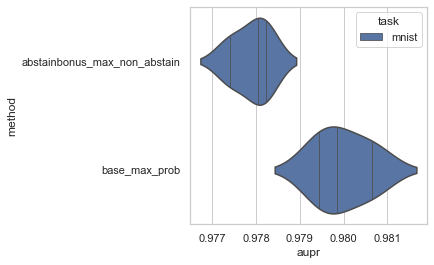

In [98]:
from spred.analytics import plot_evaluation_metric
plot_evaluation_metric(ResultDatabase(abst_results+ce_results), "aupr")

Unfortunately, this simple idea doesn't seem to have provided benefit over simple cross-entropy training, but now that we know how to create new training objectives with ```spred```, surely the sky is the limit.

### END OF TUTORIAL